In [1]:
%pip install ipykernel
%pip install keras
%pip install sklearn
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:

import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import tree, svm
from keras.datasets import cifar10
from keras import models

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype('float32')/255.
X_test = X_test.astype('float32')/255.
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

from sklearn.metrics import classification_report, confusion_matrix
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# model = SVC(kernel='linear', C=1)
# model = tree.DecisionTreeClassifier(max_depth=20)
model = svm.LinearSVC(C=1)
model.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = model.predict(X_test)

# Оценка модели
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [4]:
conf_matrix

array([[357,  48,  47, 226,  70,  55,  42,  48,  44,  63],
       [153, 267,  43, 105,  56,  59,  70,  63,  47, 137],
       [118,  28, 144, 158, 150,  78, 142, 108,  21,  53],
       [ 77,  27, 114, 227,  85, 143, 141,  66,  52,  68],
       [ 55,  18, 103, 140, 221,  70, 167, 174,  23,  29],
       [115,  26, 113, 168, 102, 241, 109,  70,  28,  28],
       [ 36,  24,  92, 137, 107, 105, 369,  64,  28,  38],
       [ 70,  25,  71, 169,  84,  74,  77, 333,  36,  61],
       [360,  68,  31,  71,  83,  65,  35,  24, 174,  89],
       [111, 118,  31, 124,  54,  41,  65,  67,  79, 310]], dtype=int64)

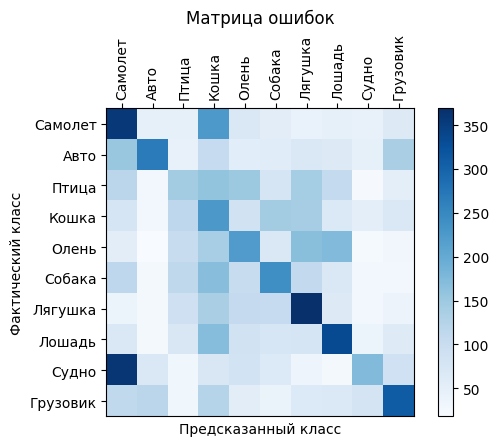

In [5]:
import matplotlib.pyplot as plt

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
# sns.heatmap(conf_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица ошибок')
plt.colorbar()
classes = ['Самолет','Авто','Птица','Кошка','Олень','Собака','Лягушка','Лошадь','Судно','Грузовик']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes,rotation=90)
plt.yticks(tick_marks, classes)
plt.xlabel('Предсказанный класс')
plt.ylabel('Фактический класс')

plt.show()